### Importação dos dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

In [19]:
# Junta as bases num unico datafram
chaves = ['loja1','loja2','loja3','loja4']
dataframes = [loja, loja2, loja3, loja4]
df = pd.concat(dataframes, keys= chaves)
df = df.reset_index()
df = df.rename(columns={'level_0': 'Loja', 'level_1': 'indice_original'})
df = df.drop(columns='indice_original', axis = 1)

In [20]:
df.head()

,Loja,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,loja1,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,loja1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,loja1,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,loja1,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,loja1,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


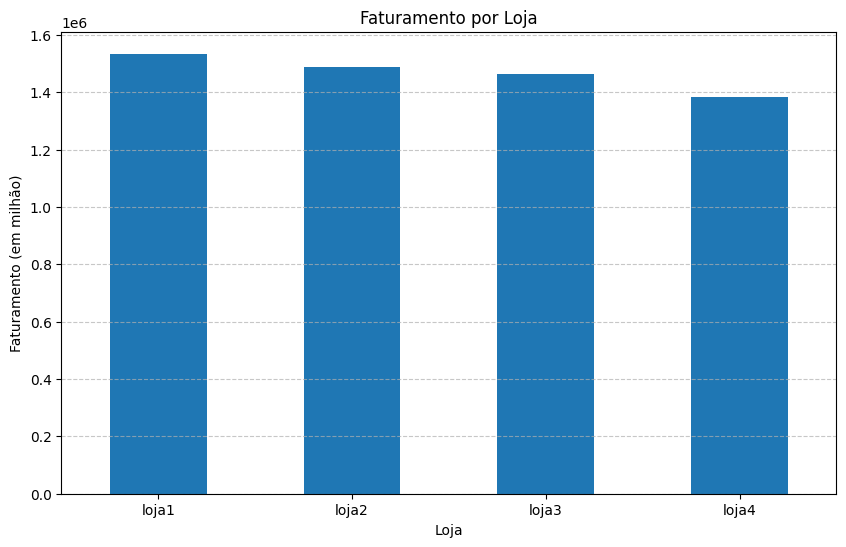

In [21]:
faturamento = df.groupby('Loja')['Preço'].sum()
faturamento.plot(kind = 'bar', figsize= (10,6))

plt.title('Faturamento por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (em milhão)')
plt.xticks(rotation=0)  # Deixa os rótulos do eixo X na horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona linhas de grade

plt.show()

/tmp/ipykernel_1023/2520541926.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  categorias[1]


np.int64(313)

# 2. Vendas por Categoria


In [28]:
categorias = df.groupby(['Categoria do Produto','Loja'])['Loja'].count()
categorias = categorias.index = categorias['Loja']
categorias.plot(kind = 'bar', stacked= True,figsize= (12,6))

plt.title('Categorias mais vendidas por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (em milhão)')
plt.xticks(rotation=0)  # Deixa os rótulos do eixo X na horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona linhas de grade

plt.show()


KeyError: 'Loja'

In [26]:
categorias

Categoria do Produto   Loja 
brinquedos             loja1    324
                       loja2    313
                       loja3    315
                       loja4    338
eletrodomesticos       loja1    312
                       loja2    305
                       loja3    278
                       loja4    254
eletronicos            loja1    448
                       loja2    422
                       loja3    451
                       loja4    451
esporte e lazer        loja1    284
                       loja2    275
                       loja3    277
                       loja4    277
instrumentos musicais  loja1    182
                       loja2    224
                       loja3    177
                       loja4    170
livros                 loja1    173
                       loja2    197
                       loja3    185
                       loja4    187
moveis                 loja1    465
                       loja2    442
                       loja3    499

# 3. Média de Avaliação das Lojas

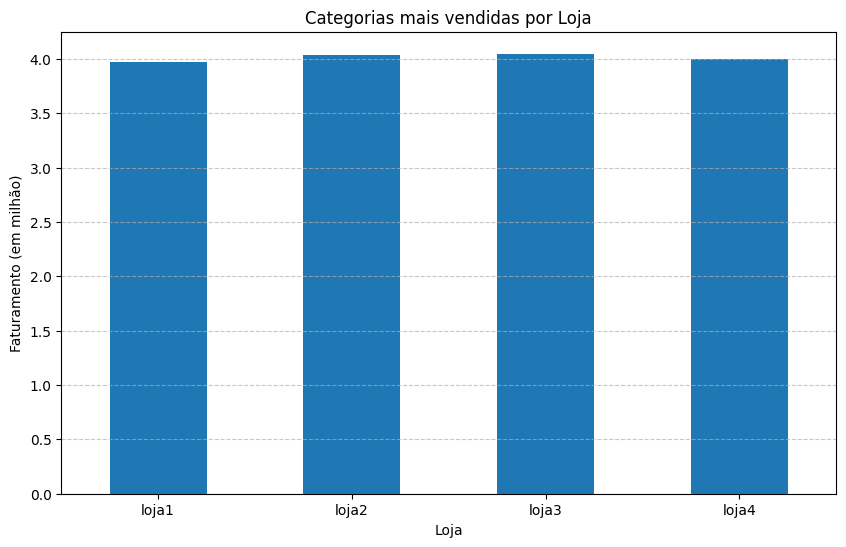

In [46]:
avaliacao = df.groupby('Loja')['Avaliação da compra'].mean()
avaliacao.plot(kind = 'bar',figsize= (10,6))
plt.title('Categorias mais vendidas por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (em milhão)')
plt.xticks(rotation=0)  # Deixa os rótulos do eixo X na horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona linhas de grade

plt.show()


# 4. Produtos Mais e Menos Vendidos

In [32]:
produtos = df.groupby(['Loja','Produto'])['Produto'].count()
produtos

Loja   Produto           
loja1  Assistente virtual    40
       Bateria               53
       Bicicleta             54
       Blocos de montar      56
       Bola de basquete      55
                             ..
loja4  Sofá retrátil         47
       TV Led UHD 4K         40
       Tablet ABXY           45
       Violão                37
       Xadrez de madeira     39
Name: Produto, Length: 204, dtype: int64

# 5. Frete Médio por Loja


In [34]:
frete = df.groupby(['Loja'])['Frete'].mean()
frete

Loja
loja1    34.691805
loja2    33.621941
loja3    33.074464
loja4    31.278997
Name: Frete, dtype: float64